In [1]:
import numpy as np
import pandas as pd
import os
import glob
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel(r'D:\Google Drive\DreamJay_Badania\Badania motywów\Badanie 3\FULL_BASE.xlsx')
#df = pd.read_excel(r'C:\Users\leont\Google Drive\DreamJay_Badania\Badania motywów\Badanie 3\FULL_BASE.xlsx')

In [4]:
df.columns

Index(['id', 'submitdate', 'lastpage', 'startlanguage', 'startdate',
       'datestamp', 'ipaddr', 'refurl', 'A1', 'reflection', 'reflection_exp',
       'reflection_music', 'reflection_motion', 'A2', 'meadow', 'meadow_exp',
       'meadow_music', 'meadow_motion', 'A3', 'lake', 'lake_exp', 'lake_music',
       'lake_motion', 'A4', 'aurora', 'aurora_exp', 'aurora_music',
       'aurora_motion', 'A5', 'blossom', 'blossom_exp', 'blossom_music',
       'blossom_motion', 'A6', 'rain', 'rain_exp', 'rain_music', 'rain_motion',
       'A7', 'waterfall', 'waterfall_exp', 'waterfall_music',
       'waterfall_motion', 'A8', 'starry night', 'starry night_exp',
       'starry night_music', 'starry night_motion', 'sleep_disord',
       'nightmares', 'nightmare_freq', 'dream_remember', 'Gender',
       'Gender_other', 'age', 'living', 'country', 'place', 'place_comment',
       'technicalities', 'opinion'],
      dtype='object')

In [5]:
df['nightmares'] = df['nightmares'].map({1: "no nightmares", 2: "nightmares"})

df['place_general'] = df['place']
df['place_general'] = df['place_general'].map({1: "on the mobile, in bed (8 persons)", 
                               2: "on the mobile, while sitting (13 persons)", 
                               3: "on the mobile, while sitting (13 persons)", 
                               4: "on a computer (30 persons)", 
                               5: "on a computer (30 persons)"})

df['place'] = df['place'].map({1: "on the mobile, in bed", 
                               2: "on the mobile, while sitting, in a public place (e.g. a restaurant)", 
                               3: "on the mobile, while sitting, in a private place (e.g. your home)", 
                               4: "on a computer, in a public place", 
                               5: "on a computer, in a private place"})

df['Gender'] = df['Gender'].map({1: "Female", 2: "Male"})


# Videos & relax/sleepiness

In [ ]:
sns.swarmplot(x='age', data=df, color="w", alpha=.7)
sns.violinplot(x='age', data=df, inner=None, palette='Set2')

# plt.savefig("output_age.png", dpi=400)

---------------
### Stripplot with means and standard errors

In [ ]:
def plotting(plt1, axis, colors=('seagreen', 'crimson')):
    
    plot1 = sns.stripplot(y=plt1, x=[""]*len(df), hue='nightmares', data=df, palette=colors, 
                          hue_order=('no nightmares', 'nightmares'), jitter=True, split=True, ax=axis)
# boxplot can be changed to violinplot, just add split=True
#     plot1 = sns.boxplot(y=plt1, x=[""]*len(df), data=df, hue='nightmares', palette=('#39ad48', '#cb0162'),
#                            hue_order=('no nightmares', 'nightmares'), ax=axis)

    is_nightmare = df.nightmares == 'nightmares'
    ngtm = df.loc[is_nightmare, plt1]
    nongtm = df.loc[~is_nightmare, plt1]
    
#     nongtm_m, nongtm_std = nongtm.mean(), nongtm.std()
    nongtm_m, nongtm_std = nongtm.mean(), stats.sem(nongtm)
    cnt = [-0.2, 0.2]
    wdth = 0.08
    axis.plot([cnt[0] - wdth, cnt[0] + wdth], [nongtm_m, nongtm_m], color=colors[0], lw=3)
    axis.fill_between([cnt[0] - wdth, cnt[0] + wdth], [nongtm_m - nongtm_std, nongtm_m - nongtm_std],
                      [nongtm_m + nongtm_std, nongtm_m + nongtm_std], color=colors[0], alpha=0.3)

#     ngtm_m, ngtm_std = ngtm.mean(), ngtm.std()
    ngtm_m, ngtm_std = ngtm.mean(), stats.sem(ngtm)
    axis.plot([cnt[1] - wdth, cnt[1] + wdth], [ngtm_m, ngtm_m], color=colors[1], lw=3)
    axis.fill_between([cnt[1] - wdth, cnt[1] + wdth], [ngtm_m - ngtm_std, ngtm_m - ngtm_std],
                      [ngtm_m + ngtm_std, ngtm_m + ngtm_std], color=colors[1], alpha=0.3)
    axis.set_ylim(0, 8)
    axis.set_xlim(cnt[0] - 2 * wdth, cnt[1] + 2 * wdth)

    axis.set_yticks([1,2,3,4,5,6,7])

#     handles, labels = plot1.get_legend_handles_labels()
#     plot1.legend(handles[:2], labels[:2], loc='best')
    
    axis.legend_.remove()

    axis.set_xlabel(plt1, fontsize=15)
    axis.set_ylabel("")

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 8))
plotting('meadow', ax[0, 0])
plotting('starry night', ax[0, 1])
plotting('waterfall', ax[0, 2])
plotting('lake', ax[0, 3])
plotting('aurora', ax[1, 0])
plotting('reflection', ax[1, 1])
plotting('blossom', ax[1, 2])
plotting('rain', ax[1, 3])

ax[0, 0].set_ylabel('Does this video make you \n feel relaxed or sleepy?', fontsize=15)
ax[1, 0].set_ylabel('Does this video make you \n feel relaxed or sleepy?', fontsize=15)

handles, labels = ax[0, 0].get_legend_handles_labels()
ax[0, 0].legend(handles[:2], labels[:2], loc='best')

# plt.savefig("output_stripplot_relax.png", dpi=400)

-----------------
### Pointplots - relax/sleepiness

In [6]:
df2 = pd.melt(df, id_vars=["nightmares", "place", "place_general", "Gender"],
              value_vars=['meadow', 'starry night', 'waterfall', 'lake', 'aurora',
                          'reflection', 'rain', 'blossom'])

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df2, dodge=True, 
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does this video make you \n feel relaxed or sleepy?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='best')

# plt.savefig("output_pointplot_relax.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df2, dodge=True, palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does this video make you \n feel relaxed or sleepy?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_pointplot_relax_place.png", dpi=400)

-----------------
### Pointplots - exp

In [7]:
df3 = pd.melt(df, id_vars=["nightmares", "place", "place_general", "Gender"],
              value_vars=['meadow_exp', 'starry night_exp', 'waterfall_exp', 'lake_exp', 'aurora_exp',
                          'reflection_exp', 'rain_exp', 'blossom_exp'])

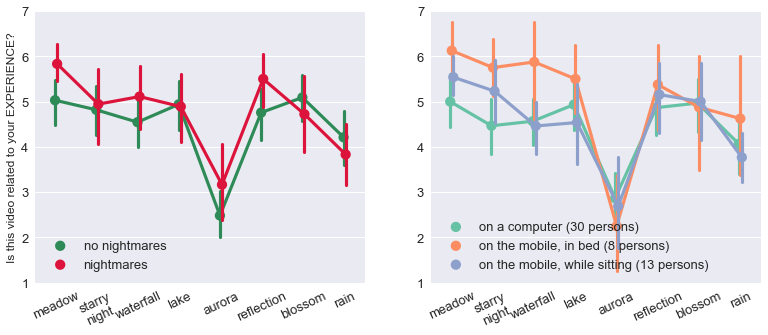

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))

# sns.set_context("notebook", font_scale=1.3)

axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df3, dodge=True, ax=ax[0],
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Is this video related to your EXPERIENCE?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='lower left')


axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df3, dodge=True, ax=ax[1],
                     palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("")
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')


# plt.savefig("output_exp.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df3, dodge=True, 
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Is this video related to your EXPERIENCE?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='best')

# plt.savefig("output_pointplot_exp.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df3, dodge=True, palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Is this video related to your EXPERIENCE?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_pointplot_exp_place.png", dpi=400)

-----------------
### Pointplots - music

In [13]:
df4 = pd.melt(df, id_vars=["nightmares", "place", "place_general", "Gender"],
              value_vars=['meadow_music', 'starry night_music', 'waterfall_music', 'lake_music', 'aurora_music',
                          'reflection_music', 'rain_music', 'blossom_music'])

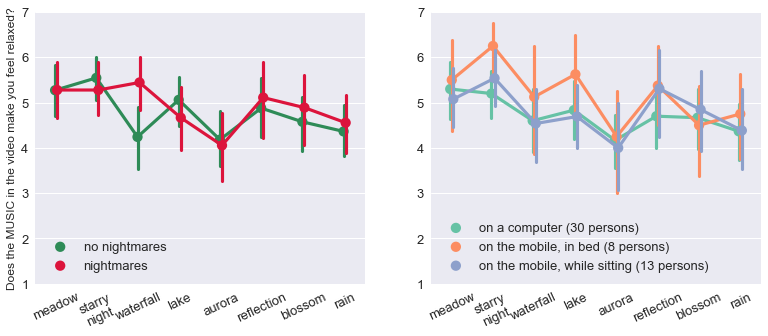

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))

# sns.set_context("notebook", font_scale=1.3)

axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df4, dodge=True, ax=ax[0],
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does the MUSIC in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='lower left')

axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df4, dodge=True, ax=ax[1],
                     palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("")
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_music.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df4, dodge=True, 
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does the MUSIC in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='best')

# plt.savefig("output_pointplot_music.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df4, dodge=True, palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does the MUSIC in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_pointplot_music_place.png", dpi=400)

-----------------
### Pointplots - motion

In [16]:
df5 = pd.melt(df, id_vars=["nightmares", "place", "place_general", "Gender"],
              value_vars=['meadow_motion', 'starry night_motion', 'waterfall_motion', 'lake_motion', 'aurora_motion',
                          'reflection_motion', 'rain_motion', 'blossom_motion'])

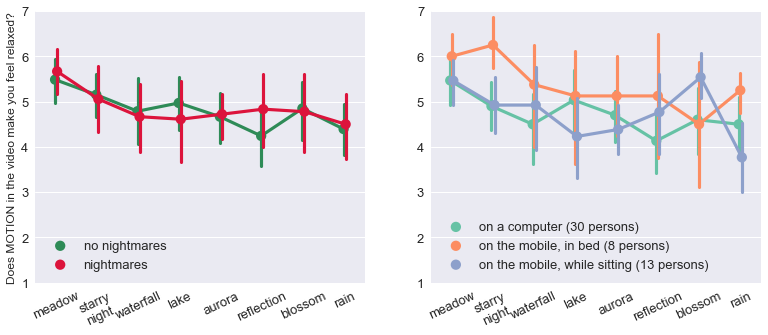

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))

# sns.set_context("notebook", font_scale=1.3)

axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df5, dodge=True, ax=ax[0],
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does MOTION in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='lower left')

axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df5, dodge=True, ax=ax[1],
                     palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("")
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_motion.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='nightmares', data=df5, dodge=True, 
                     palette=('seagreen', 'crimson'), hue_order=('no nightmares', 'nightmares'))
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does MOTION in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], loc='best')

# plt.savefig("output_pointplot_motion.png", dpi=400)

In [ ]:
axis = sns.pointplot(x='variable', y='value', hue='place_general', data=df5, dodge=True, palette="Set2")
axis.set_xticklabels(['meadow', 'starry\nnight', 'waterfall', 'lake', 'aurora',
                          'reflection', 'blossom', 'rain'], rotation=25) 
axis.set_xlabel("")
axis.set_ylabel("Does MOTION in the video make you feel relaxed?", fontsize=12)
axis.set_ylim(bottom=1, top=7)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:3], labels[:3], loc='best')

# plt.savefig("output_pointplot_motion_place.png", dpi=400)

# Analizy statystyczne

In [19]:
from statsmodels.formula.api import ols

In [21]:
dff = df2

In [22]:
dff = dff.rename(columns={'variable': 'video', 'value': 'relax'})
dff['exp'] = df3.value
dff['music'] = df4.value
dff['motion'] = df5.value

In [23]:
model = ols('relax ~ exp + music + motion', dff).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  relax   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     374.6
Date:                Fri, 04 Aug 2017   Prob (F-statistic):          2.81e-116
Time:                        22:58:39   Log-Likelihood:                -509.45
No. Observations:                 408   AIC:                             1027.
Df Residuals:                     404   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2664      0.148      1.795      0.0

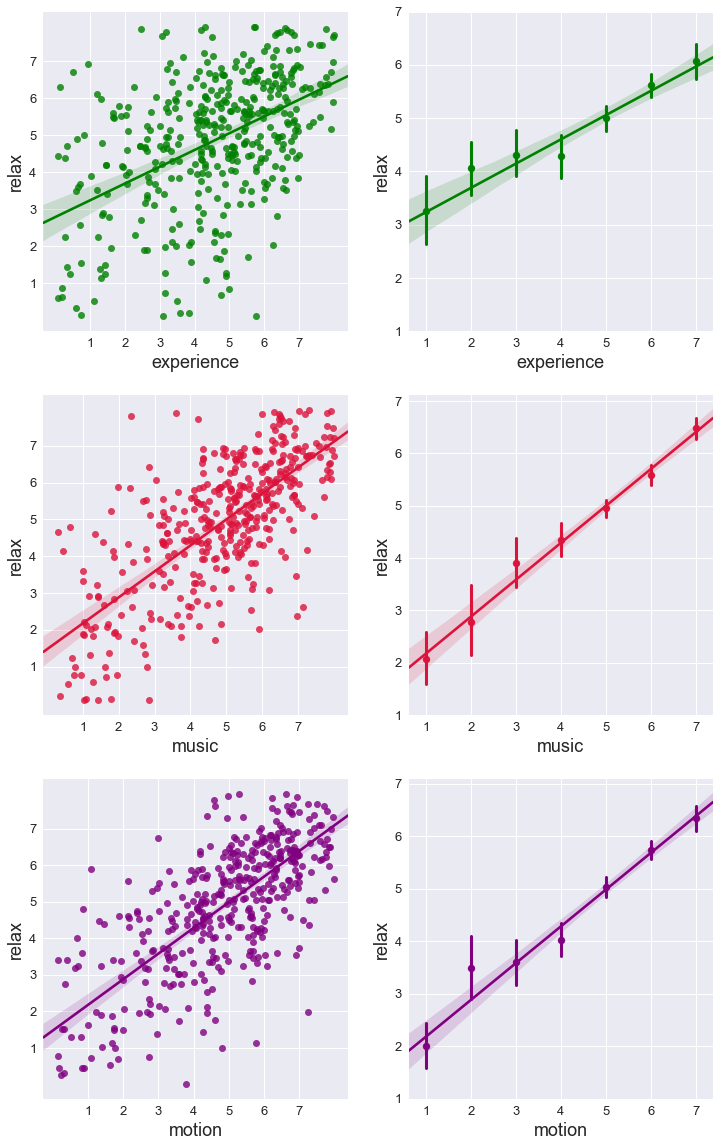

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 20))

plt1 = sns.regplot(y='relax', x='exp', x_jitter=True, y_jitter=True, data=dff, ax=ax[0, 0], color="green") 
plt2 = sns.regplot(y='relax', x='exp', x_estimator=np.mean, data=dff, ax=ax[0, 1], color="green") 

plt3 = sns.regplot(y='relax', x='music', x_jitter=True, y_jitter=True, data=dff, ax=ax[1, 0], color="crimson") 
plt4 = sns.regplot(y='relax', x='music', x_estimator=np.mean, data=dff, ax=ax[1, 1], color="crimson") 

plt5 = sns.regplot(y='relax', x='motion', x_jitter=True, y_jitter=True, data=dff, ax=ax[2, 0], color="purple") 
plt6 = sns.regplot(y='relax', x='motion', x_estimator=np.mean, data=dff, ax=ax[2, 1], color="purple") 

x = range(1, 8)

plt1.set_yticks(x)
plt1.set_xticks(x)
plt2.set_yticks(x)
plt3.set_xticks(x)
plt3.set_yticks(x)
plt4.set_yticks(x)
plt5.set_xticks(x)
plt5.set_yticks(x)
plt6.set_yticks(x)

ax[0, 0].set_xlabel('experience', fontsize=18)
ax[0, 1].set_xlabel('experience', fontsize=18)
ax[1, 0].set_xlabel('music', fontsize=18)
ax[1, 1].set_xlabel('music', fontsize=18)
ax[2, 0].set_xlabel('motion', fontsize=18)
ax[2, 1].set_xlabel('motion', fontsize=18)
ax[0, 0].set_ylabel('relax', fontsize=18)
ax[0, 1].set_ylabel('relax', fontsize=18)
ax[1, 0].set_ylabel('relax', fontsize=18)
ax[1, 1].set_ylabel('relax', fontsize=18)
ax[2, 0].set_ylabel('relax', fontsize=18)
ax[2, 1].set_ylabel('relax', fontsize=18)

# plt.savefig("output_regressions.png", dpi=400)

### T tests

In [ ]:
print("Test t między grupami:", 
    stats.ttest_ind(df[df['Q4_SQ001'] == 'nightmares']['waterfall'], 
                df[df['Q4_SQ001'] == 'no nightmares']['waterfall']))

print("Test równości wariancji:", 
    stats.levene(df[df['Q4_SQ001'] == 'nightmares']['waterfall'], 
                df[df['Q4_SQ001'] == 'no nightmares']['waterfall']))

print("Test z powtarzanym pomiarem:", (stats.ttest_rel(df['waterfall'], df['meadow'])))